In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.linear_model import LinearRegression

In [ ]:
# Using dataset from 
df = pd.read_csv('newdf.csv')

In [32]:
X, y = df.drop(['Value', 'name', 'team', 'contract'], axis=1), df['Value']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = make_pipeline(
    make_column_transformer(
        (OneHotEncoder(), make_column_selector(dtype_include='object')),
        (StandardScaler(), make_column_selector(dtype_include='number'))
    ),
    LinearRegression()
)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9454555763490042

<Axes: ylabel='feature'>

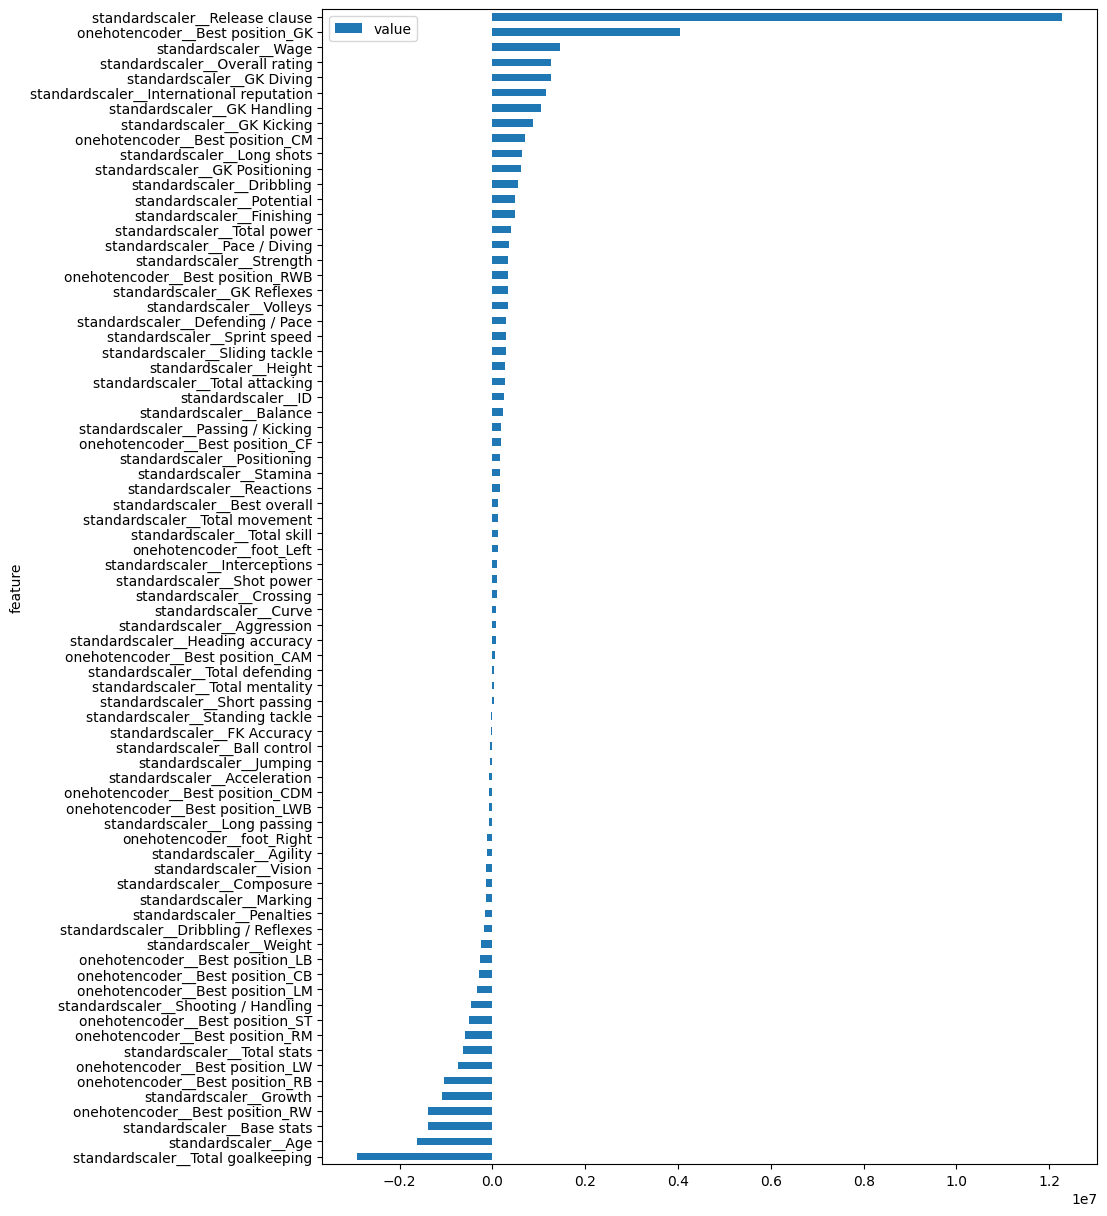

In [45]:
pd.DataFrame({
    'feature': model.steps[0][1].get_feature_names_out(),
    'value': model.steps[1][1].coef_, 
}).sort_values('value', ascending=True).plot.barh(x='feature', y='value', figsize=(10, 15))